In [1]:
import os
import numpy as np
import tensorflow as tf
import skimage as sk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import pickle


import models

PATH = '../data/landmarks/'

IMAGE_SIZE = (500,500,3)

# Limite size of input for testing
TEST_LIMIT = 1000

SPLIT = 0.8
BATCH_SIZE = 64
EPOCHS = 20
STEPS_PER_EPOCH = 40

## Dataset pre-processing

In [2]:
with open(PATH + 'dict.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

#     dictionary={
#     'filenames': string array with the full path,
#     'classes': array (len,1),
#     'bboxes': array (len,4),
#     'landmarks': array (len,10)
#     }
    
h,w,c=IMAGE_SIZE
input_images = np.empty((0,h,w,c))
for i in tqdm_notebook(range(len(dictionary['filenames']))):
#for i in tqdm_notebook(range(10)):
    image = sk.io.imread(dictionary['filenames'][i])
    input_images = np.vstack((input_images,[image]))

HBox(children=(IntProgress(value=0, max=1313), HTML(value='')))

KeyboardInterrupt: 

In [ ]:
with open(PATH + 'dict.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

alpha_bbox=0.5
alpha_landmarks=0.5

input_beta = dictionary['classes']

output_classes = dictionary['classes']
output_bboxes = alpha_bbox * dictionary['bboxes']
# print(output_bboxes[250:260])
output_landmarks = alpha_bbox * dictionary['landmarks']
# print(output_landmarks[250:260])
# print(output_landmarks[250:260,0:10:2])
h,w,c = IMAGE_SIZE
# Normalize output_landmarks
output_landmarks[:,0:10:2] = output_landmarks[:,0:10:2]/h
output_landmarks[:,1:10:2] = output_landmarks[:,1:10:2]/w
# print(output_landmarks[250:260])

print("Number of positive: " + str(len(input_beta[input_beta==1])))
print("Number of negative: " + str(len(input_beta[input_beta==0])))

## Model definition

In [23]:
%load_ext autoreload
%autoreload 1
%aimport models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
model = models.PNet()
print(model.summary())
losses = {
    'output_class': 'binary_crossentropy',
    'output_bbox': 'mse',
    'output_landmarks': 'mse'
}

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss=losses,
              metrics=['accuracy']) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
lambda_12 (Lambda)              (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, None, None, 1 448         lambda_12[0][0]                  
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, None, None, 1 2320        conv2d_28[0][0]                  
__________________________________________________________________________________________________
max_poolin

## Training

In [41]:
callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         '../weights/landmarks/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
#         save_best_only=True,
#         save_weights_only=True
#         ),
    tf.keras.callbacks.TensorBoard(log_dir='../output/logs')
    ]

model.fit(
    {'input_image':input_images, 'input_beta':input_beta},
    {'output_class':output_classes, 'output_bbox':output_bboxes, 'output_landmarks':output_landmarks},
    epochs=40,
    batch_size=BATCH_SIZE,
    validation_split=0.2
    #callbacks=callbacks
)

for i in range

Train on 1050 samples, validate on 263 samples
Epoch 1/40
1050/1050 [==============================] - ETA: 22s - loss: 0.7990 - output_class_loss: 0.6262 - output_bbox_loss: 0.1425 - output_landmarks_loss: 0.0303 - output_class_acc: 0.7031 - output_bbox_acc: 0.7188 - output_landmarks_acc: 0.484 - ETA: 11s - loss: 0.8739 - output_class_loss: 0.6933 - output_bbox_loss: 0.1502 - output_landmarks_loss: 0.0305 - output_class_acc: 0.6172 - output_bbox_acc: 0.6719 - output_landmarks_acc: 0.492 - ETA: 7s - loss: 0.8897 - output_class_loss: 0.7098 - output_bbox_loss: 0.1499 - output_landmarks_loss: 0.0300 - output_class_acc: 0.5938 - output_bbox_acc: 0.6615 - output_landmarks_acc: 0.510 - ETA: 5s - loss: 0.9217 - output_class_loss: 0.7238 - output_bbox_loss: 0.1668 - output_landmarks_loss: 0.0311 - output_class_acc: 0.5703 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.51 - ETA: 4s - loss: 0.9060 - output_class_loss: 0.7014 - output_bbox_loss: 0.1727 - output_landmarks_loss: 0.0319 - outp

1050/1050 [==============================] - ETA: 2s - loss: 0.7075 - output_class_loss: 0.5301 - output_bbox_loss: 0.1586 - output_landmarks_loss: 0.0188 - output_class_acc: 0.7812 - output_bbox_acc: 0.7031 - output_landmarks_acc: 0.53 - ETA: 2s - loss: 0.6772 - output_class_loss: 0.5221 - output_bbox_loss: 0.1394 - output_landmarks_loss: 0.0157 - output_class_acc: 0.8203 - output_bbox_acc: 0.6953 - output_landmarks_acc: 0.58 - ETA: 2s - loss: 0.6739 - output_class_loss: 0.5178 - output_bbox_loss: 0.1387 - output_landmarks_loss: 0.0174 - output_class_acc: 0.8333 - output_bbox_acc: 0.6823 - output_landmarks_acc: 0.55 - ETA: 2s - loss: 0.6843 - output_class_loss: 0.5178 - output_bbox_loss: 0.1480 - output_landmarks_loss: 0.0186 - output_class_acc: 0.8281 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.55 - ETA: 1s - loss: 0.6878 - output_class_loss: 0.5208 - output_bbox_loss: 0.1473 - output_landmarks_loss: 0.0196 - output_class_acc: 0.8187 - output_bbox_acc: 0.6438 - output_landmar

1050/1050 [==============================] - ETA: 2s - loss: 0.7311 - output_class_loss: 0.5640 - output_bbox_loss: 0.1511 - output_landmarks_loss: 0.0160 - output_class_acc: 0.7969 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.67 - ETA: 2s - loss: 0.6945 - output_class_loss: 0.5328 - output_bbox_loss: 0.1461 - output_landmarks_loss: 0.0156 - output_class_acc: 0.8203 - output_bbox_acc: 0.6719 - output_landmarks_acc: 0.66 - ETA: 2s - loss: 0.6688 - output_class_loss: 0.5217 - output_bbox_loss: 0.1320 - output_landmarks_loss: 0.0151 - output_class_acc: 0.8229 - output_bbox_acc: 0.6823 - output_landmarks_acc: 0.65 - ETA: 2s - loss: 0.6584 - output_class_loss: 0.5189 - output_bbox_loss: 0.1248 - output_landmarks_loss: 0.0146 - output_class_acc: 0.8398 - output_bbox_acc: 0.6875 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.6910 - output_class_loss: 0.5270 - output_bbox_loss: 0.1450 - output_landmarks_loss: 0.0190 - output_class_acc: 0.8219 - output_bbox_acc: 0.6406 - output_landmar

1050/1050 [==============================] - ETA: 2s - loss: 0.7463 - output_class_loss: 0.5568 - output_bbox_loss: 0.1706 - output_landmarks_loss: 0.0188 - output_class_acc: 0.7031 - output_bbox_acc: 0.6719 - output_landmarks_acc: 0.53 - ETA: 2s - loss: 0.7210 - output_class_loss: 0.5203 - output_bbox_loss: 0.1841 - output_landmarks_loss: 0.0166 - output_class_acc: 0.7891 - output_bbox_acc: 0.6797 - output_landmarks_acc: 0.57 - ETA: 2s - loss: 0.7108 - output_class_loss: 0.5260 - output_bbox_loss: 0.1678 - output_landmarks_loss: 0.0170 - output_class_acc: 0.7760 - output_bbox_acc: 0.6458 - output_landmarks_acc: 0.57 - ETA: 1s - loss: 0.7084 - output_class_loss: 0.5238 - output_bbox_loss: 0.1674 - output_landmarks_loss: 0.0173 - output_class_acc: 0.7891 - output_bbox_acc: 0.6484 - output_landmarks_acc: 0.56 - ETA: 1s - loss: 0.6710 - output_class_loss: 0.5117 - output_bbox_loss: 0.1444 - output_landmarks_loss: 0.0150 - output_class_acc: 0.8156 - output_bbox_acc: 0.6719 - output_landmar

1050/1050 [==============================] - ETA: 2s - loss: 0.6224 - output_class_loss: 0.4711 - output_bbox_loss: 0.1370 - output_landmarks_loss: 0.0143 - output_class_acc: 0.8750 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.62 - ETA: 2s - loss: 0.6677 - output_class_loss: 0.4916 - output_bbox_loss: 0.1569 - output_landmarks_loss: 0.0192 - output_class_acc: 0.8203 - output_bbox_acc: 0.6406 - output_landmarks_acc: 0.57 - ETA: 2s - loss: 0.6823 - output_class_loss: 0.4977 - output_bbox_loss: 0.1656 - output_landmarks_loss: 0.0190 - output_class_acc: 0.8229 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.55 - ETA: 2s - loss: 0.6814 - output_class_loss: 0.4953 - output_bbox_loss: 0.1678 - output_landmarks_loss: 0.0183 - output_class_acc: 0.8164 - output_bbox_acc: 0.6562 - output_landmarks_acc: 0.55 - ETA: 1s - loss: 0.6647 - output_class_loss: 0.4926 - output_bbox_loss: 0.1553 - output_landmarks_loss: 0.0168 - output_class_acc: 0.8187 - output_bbox_acc: 0.6562 - output_landmar

KeyboardInterrupt: 

## Prediction

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[array([[0.62271005]], dtype=float32), array([[-0.27091327, -0.12630245, -0.22115855, -0.18504268]],
      dtype=float32), array([[-0.05874377, -0.23611328, -0.10306387,  0.11495683,  0.17331746,
         0.00552764, -0.05352719,  0.06780042, -0.26466525, -0.14236663]],
      dtype=float32)]


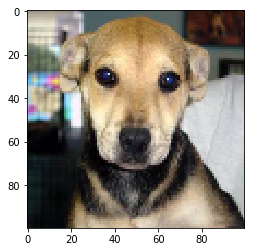

In [42]:
test_image = sk.io.imread(PATH + 'evaluate/' + 'dog.4.jpg')
test_image = sk.transform.resize(test_image, IMAGE_SIZE)
plt.imshow(test_image)
test_beta = 1.0
input_dict = {'input_image':np.array([test_image]),'input_beta':np.array([test_beta])}
prediction = model.predict(input_dict)
print(prediction)

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[array([[0.622643]], dtype=float32), array([[-0., -0., -0., -0.]], dtype=float32), array([[-0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.]], dtype=float32)]


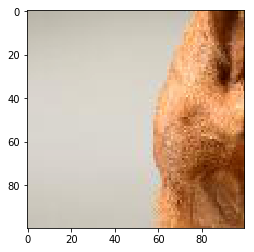

In [43]:
test_image = sk.io.imread(PATH + 'resized/' + '0_neg_1.jpg')
test_image = sk.transform.resize(test_image, IMAGE_SIZE)
plt.imshow(test_image)
test_beta = 0.0
input_dict = {'input_image':np.array([test_image]),'input_beta':np.array([test_beta])}
prediction = model.predict(input_dict)
print(prediction)

In [47]:
# General accuracy
input_dict = {'input_image':input_images,'input_beta':input_beta}
prediction = model.predict(input_dict)
classes = prediction[0]
accuracy = 0
for i in range(len(classes)):
    if (classes[i] < 0.5 and input_beta[i]==0) or (classes[i] > 0.5 and input_beta[i]==1):
        accuracy += 1
print(accuracy/len(classes))

0.7060167555217061


In [49]:
other_data = 'D:/PROGRAMMATION/Dataset/dogscats/dogscats/valid/dogs/'
fnames = os.listdir(other_data)
test_inputs = np.zeros((100,100,100,3))
for i in range(100):
    test_image = sk.io.imread(other_data + fnames[i])
    test_image = sk.transform.resize(test_image, (100,100,3))
    test_inputs[i] = test_image

input_dict = {'input_image':test_inputs,'input_beta':np.ones(100)}
prediction = model.predict(input_dict)
classes = prediction[0]
accuracy = 0
for i in range(len(classes)):
    if (classes[i] < 0.5 and input_beta[i]==0) or (classes[i] > 0.5 and input_beta[i]==1):
        accuracy += 1
print(accuracy/len(classes))

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0.5
